# Data Monitoring

####  import libraries 

In [2]:
# importings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
#import seaborn as sns
#%matplotlib widget 

In [4]:
covid_raw = pd.read_csv('../Data/Raw/owid-covid-data-clean.csv')

#### iran data extracting and monitoring

In [5]:
Iran_data = covid_raw[ covid_raw["location"] == "Iran" ]

In [6]:
Iran_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,life_expectancy,human_development_index,population,excess_mortality,total_cases_smoothed,total_deaths_smoothed,total_boosters_smooth,people_fully_vaccinated_smooth,total_vaccinations_smooth,total_people_vaccinated_smooth
118180,IRN,Asia,Iran,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,...,76.68,0.783,88550568.0,-6.33,0.0,0.0,0.0,0.0,0.0,0.0
118181,IRN,Asia,Iran,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,...,76.68,0.783,88550568.0,-6.33,0.0,0.0,0.0,0.0,0.0,0.0
118182,IRN,Asia,Iran,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,...,76.68,0.783,88550568.0,-6.33,0.0,0.0,0.0,0.0,0.0,0.0
118183,IRN,Asia,Iran,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,...,76.68,0.783,88550568.0,-6.33,0.0,0.0,0.0,0.0,0.0,0.0
118184,IRN,Asia,Iran,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,...,76.68,0.783,88550568.0,-6.33,0.0,0.0,0.0,0.0,0.0,0.0


<div style="text-align: right">
برای کشور **ایران** حدود ۴۴ ویژگی و در ۱۲۳۱ روز داده داریم. برای دیگر کشورها نیز مقادیر باید در همین مقیاس باشند.
</div>
<div dir='rtl'>

In [15]:
np.shape(Iran_data)

(1231, 44)

#### ویژگی های موجود در داده ها

<div style="text-align: right">
ویژگی هایی که در این دادگان هست با توضیحات عبارت از جدول زیر است:
</div>
<div dir='rtl'>

<div style="text-align: center">


| عنوان ویژگی                    | توضیحات                                      |
| ------------------------------ | -------------------------------------------- |
| iso_code                       | شناسه کشور                                   |
| continent                      | قاره                                         |
| location                       | نام کشور                                     |
| date                           | تاریخ ثبت گزارش                              |
| total_cases                    | مجموع موارد                                  |
| new_cases                      | موارد جدید                                   |
| new_cases_smoothed             | موارد جدید اصلاح شده                         |
| total_deaths                   | مجموع مرگ و میر                              |
| new_deaths                     | مرگ و میر تازه                               |
| new_deaths_smoothed            | مرگ و میر تازه اصلاح شده                     |
| reproduction_rate              | نرخ تخمینی رشد جمعیت کرونازده ها             |
| icu_patients                   | بیماران مراقبت های ویژه                      |
| hosp_patients                  | بیماران بیمارستانی                           |
| weekly_icu_admissions          | پذیرش هفتگی مهو                              |
| weekly_hosp_admissions         | پذیرش هفتگی بیمارستان                        |
| total_vaccinations             | مجموع واکسینه شده ها                         |
| people_vaccinated              | جمعیت واکسینه شده                            |
| people_fully_vaccinated        | جمعیت کاملا واکسینه شده                      |
| total_boosters                 | مجموع واکسینه شده های ثانویه(بوستر)          |
| new_vaccinations_smoothed      | واکسنش های جدید (اصلاح شده)                  |
| new_people_vaccinated_smoothed |                                              |
| stringency_index               | شاخص سختی                                    |
| population_density             | چگالی جمعیت                                  |
| median_age                     | میانه سنی                                    |
| aged_65_older                  | بالای ۶۵ ساله ها                             |
| aged_70_older                  | بالای ۷۰ ساله ها                             |
| gdp_per_capita                 | سرانه تولید ملی                              |
| extreme_poverty                | فقر مطلق                                     |
| cardiovasc_death_rate          | نرخ مرگ و میر ناشی از بیماری قلبی عروقی      |
| diabetes_prevalence            | درصد دیابتی ها                               |
| female_smokers                 | زنان سیگاری                                  |
| male_smokers                   | مردان سیگاری                                 |
| handwashing_facilities         | بخشی از جمعیت که به وسائل شستشو دسترسی دارند |
| hospital_beds_per_thousand     | تخت های بیمارستان به ازای هزار نفر           |
| life_expectancy                | امید به زندگی                                |
| human_development_index        | شاخص توسعه انسانی                            |
| population                     | جمعیت                                        |
| excess_mortality               | درصد تغییرات مرگ ماهانه یا سالانه            |
| total_cases_smoothed           | مجموع موارد اصلاح شده                        |
| total_deaths_smoothed          | مجموع مرگ و میر اصلاح شده                    |
| total_boosters_smooth          | مجموع دوز ثانویه اصلاح شده                   |
| people_fully_vaccinated_smooth | جمعیت کاملا واکسینه شده اصلاح شده            |
| total_vaccinations_smooth      | مجموع واکسنش ها اصلاح شده                    |
| total_people_vaccinated_smooth | مجموع مردمان واکیسنه شده اصلاح شده           |

</div>
<div dir='ltl'>

### نمودارهای زمانی

In [18]:
max(Iran_data["total_deaths"])

146204.0

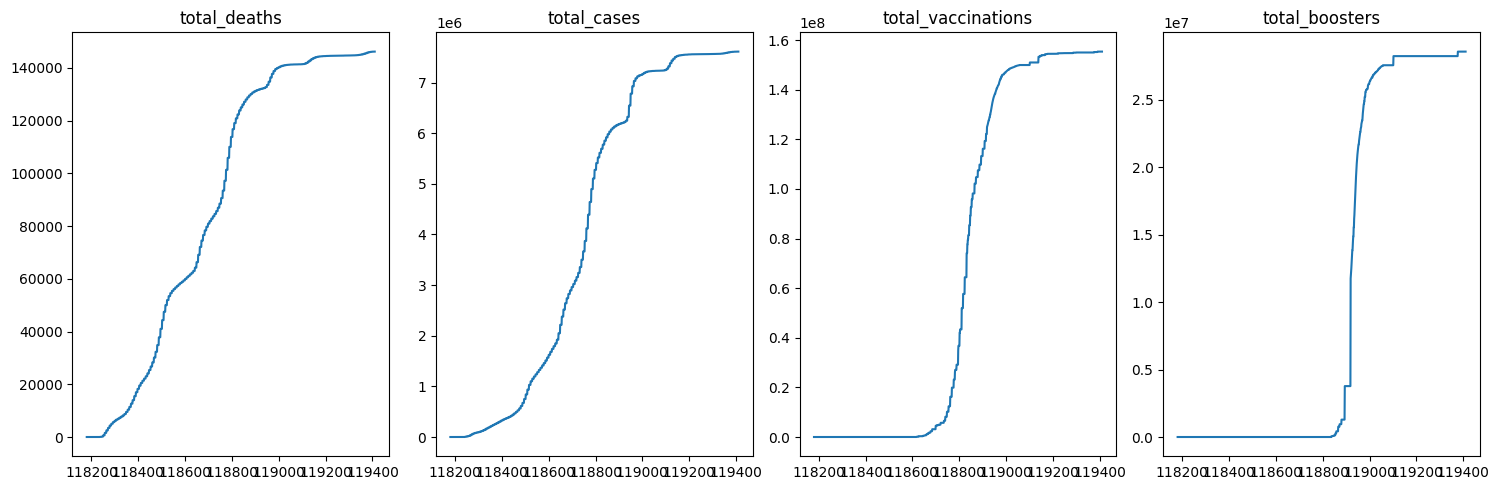

In [26]:

# Generate sample data
#x = np.linspace(0, 10, 100)
y1, y2, y3, y4 = Iran_data["total_deaths"] , Iran_data["total_cases"], Iran_data["total_vaccinations"], Iran_data["total_boosters"]

# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# Plot each function and set titles
functions = [(y1, 'total_deaths'), (y2, 'total_cases'), (y3, 'total_vaccinations'), (y4, 'total_boosters')]
for ax, (y, title) in zip(axs, functions):
    ax.plot( y)
    ax.set_title(title)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [29]:
max(Iran_data["total_vaccinations"])

155369313.0

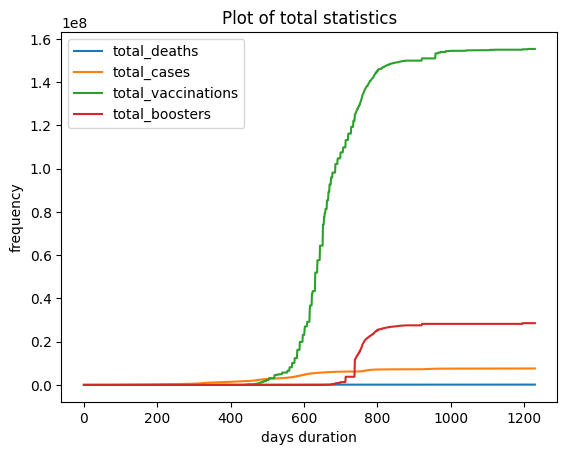

In [32]:
plt.plot((Iran_data["total_deaths"]) , label="total_deaths")
plt.plot((Iran_data["total_cases"]) , label="total_cases")
plt.plot((Iran_data["total_vaccinations"]) , label="total_vaccinations")
plt.plot((Iran_data["total_boosters"]) , label="total_boosters")

plt.title('Plot of total statistics')
plt.xlabel('days duration')
plt.ylabel('frequency')
plt.legend()

plt.show()

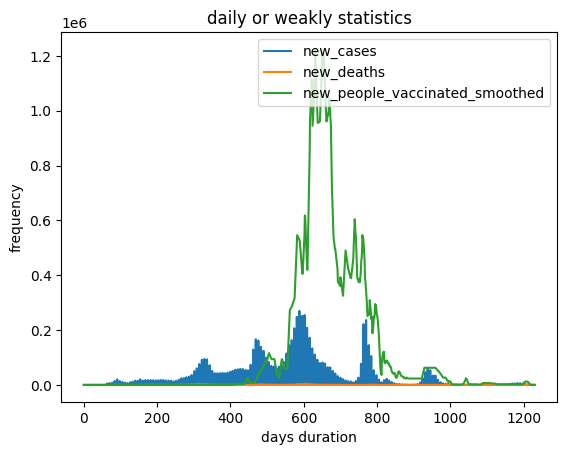

In [38]:
plt.plot((Iran_data["new_cases"]) , label="new_cases")
plt.plot((Iran_data["new_deaths"]) , label="new_deaths")
plt.plot((Iran_data["new_people_vaccinated_smoothed"]) , label="new_people_vaccinated_smoothed")
#plt.plot((Iran_data["new_vaccinations_smoothed"]) , label="new_vaccinations_smoothed")

plt.title('daily or weakly statistics')
plt.xlabel('days duration')
plt.ylabel('frequency')
plt.legend()

plt.show()

In [39]:
correlation12 = np.corrcoef(Iran_data["new_cases"], Iran_data["new_deaths"])[0, 1]
correlation13 = np.corrcoef(Iran_data["new_cases"], Iran_data["new_people_vaccinated_smoothed"])[0, 1]
print(f"Correlation between new_cases and new_deaths: {correlation12:.2f}")
print(f"Correlation between new_cases and new_people_vaccinated_smoothed: {correlation12:.2f}")

Correlation between new_cases and new_deaths: 0.8492942693011797
Correlation between new_cases and new_people_vaccinated_smoothed: 0.14622758525038743


#### برای چند کشور مختلف

In [ ]:
# Assuming covid_raw is your DataFrame containing COVID-19 data
countries = np.array(covid_raw["location"].unique())
number_of_selection = 6
selected_countries = np.random.choice(countries, size=number_of_selection, replace=False)

# Create subplots
fig, axs = plt.subplots(number_of_selection, 2, figsize=(15, 20))

C:\Users\hafez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\hafez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Correlations in 'Marshall Islands':
new_cases and new_deaths: 0.88
new_cases and new_people_vaccinated_smoothed:0.88

Correlations in 'United Kingdom':
new_cases and new_deaths: 0.37
new_cases and new_people_vaccinated_smoothed:0.37

Correlations in 'Central African Republic':
new_cases and new_deaths: 0.71
new_cases and new_people_vaccinated_smoothed:0.71

Correlations in 'Latvia':
new_cases and new_deaths: 0.59
new_cases and new_people_vaccinated_smoothed:0.59

Correlations in 'Malaysia':
new_cases and new_deaths: 0.76
new_cases and new_people_vaccinated_smoothed:0.76

Correlations in 'Zambia':
new_cases and new_deaths: 0.72
new_cases and new_people_vaccinated_smoothed:0.72



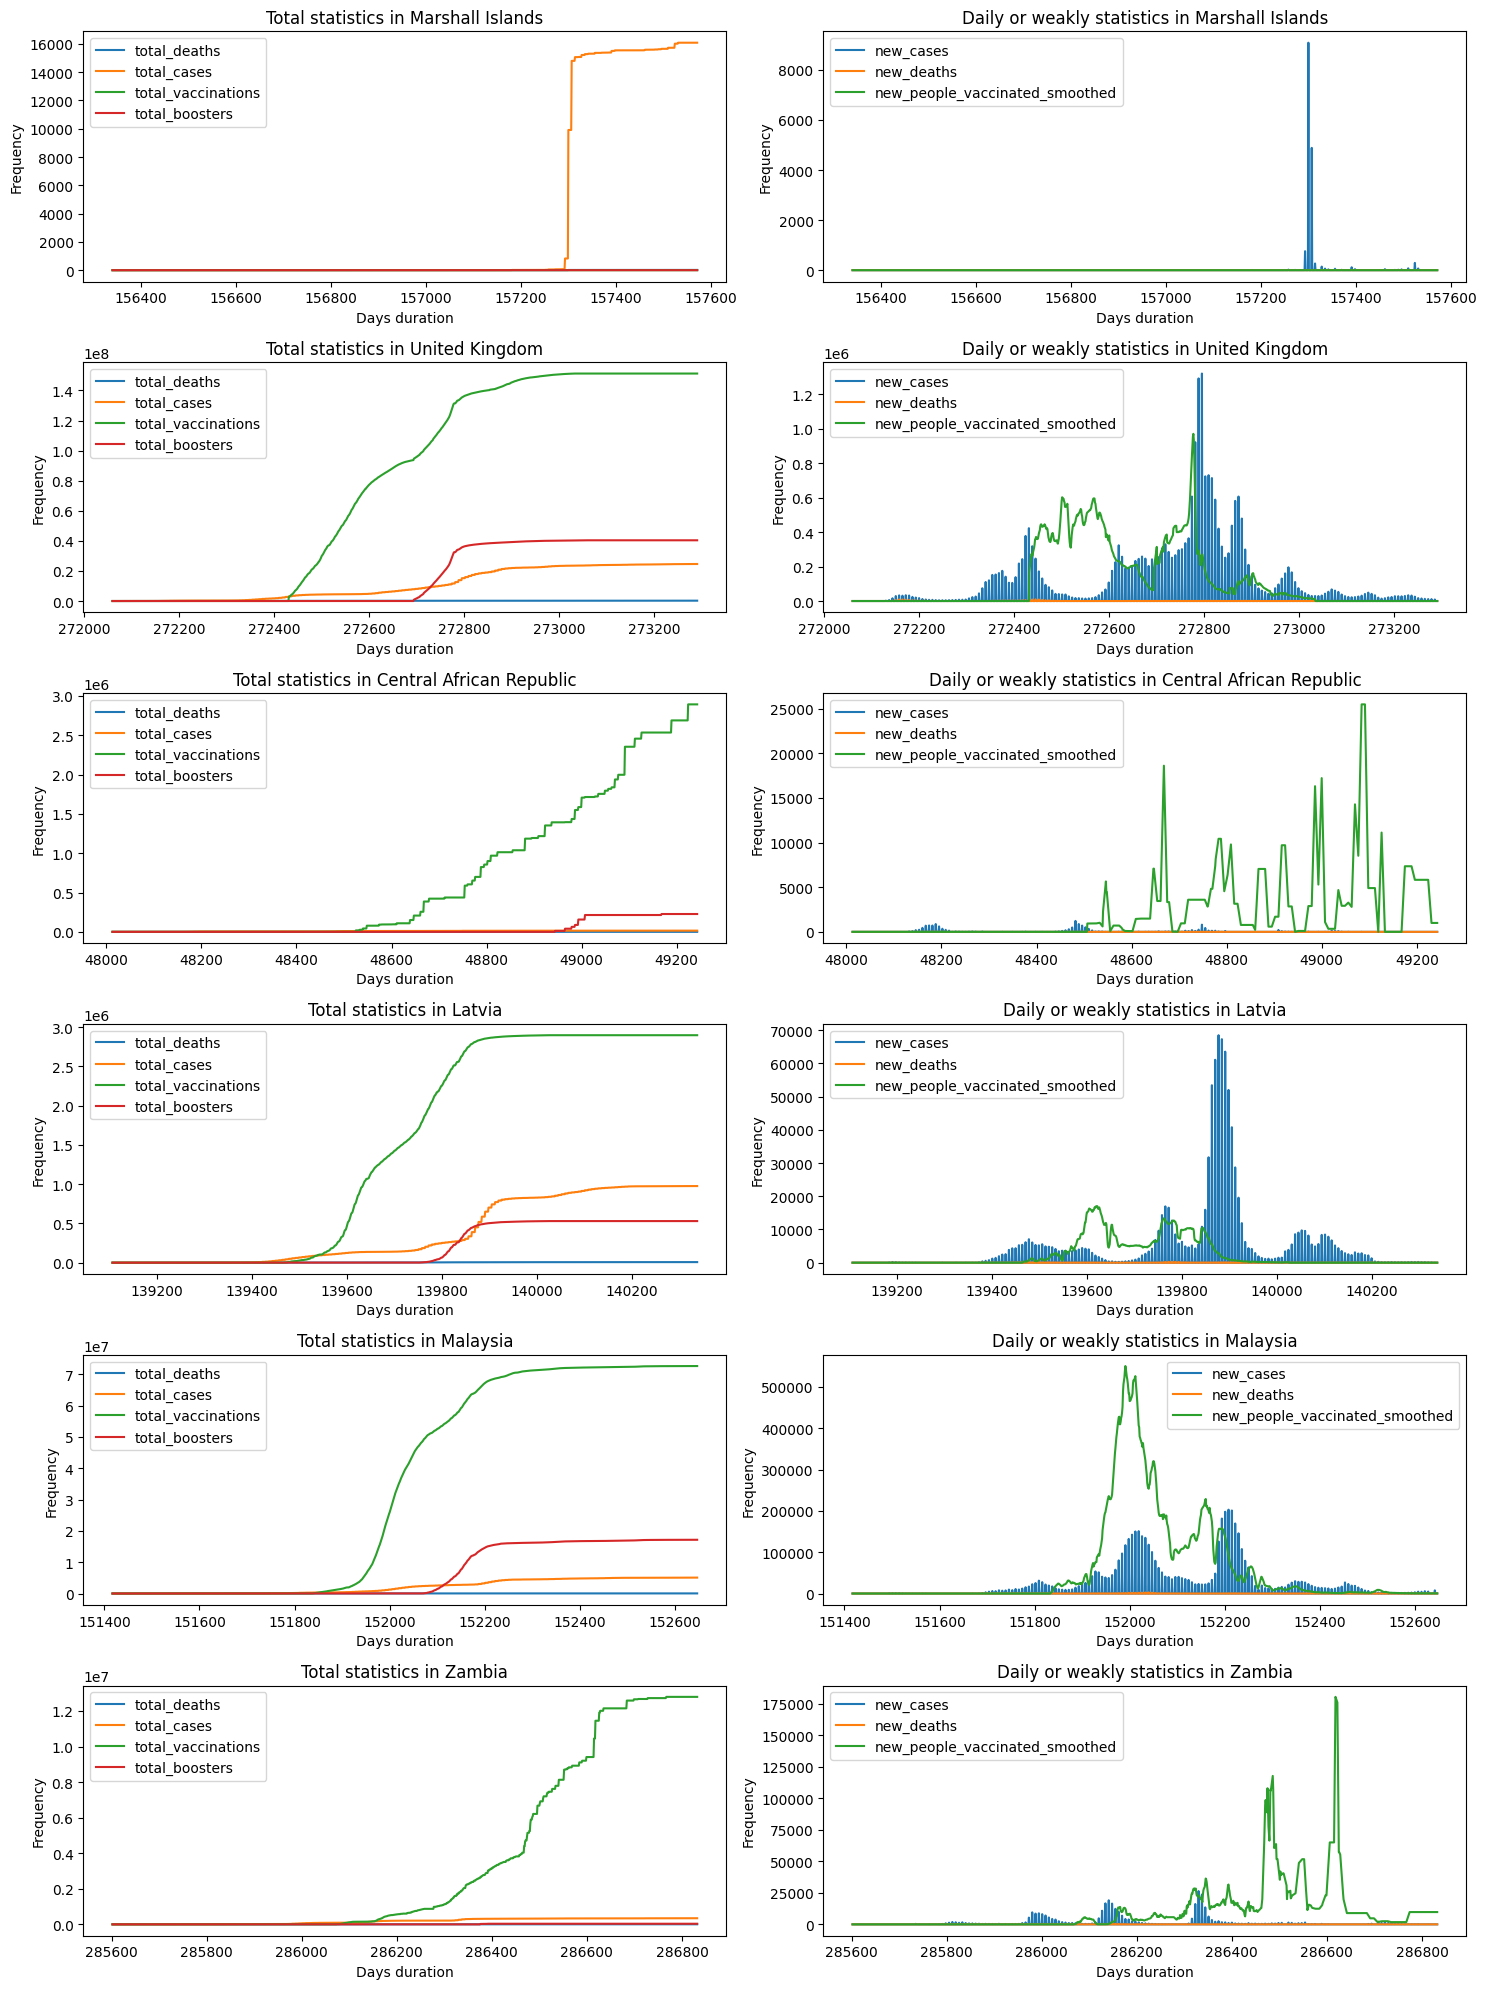

In [57]:
for i, country in enumerate(selected_countries):
    country_data = covid_raw[covid_raw["location"] == country]

    # Plot total statistics
    axs[i, 0].plot(country_data["total_deaths"], label="total_deaths")
    axs[i, 0].plot(country_data["total_cases"], label="total_cases")
    axs[i, 0].plot(country_data["total_vaccinations"], label="total_vaccinations")
    axs[i, 0].plot(country_data["total_boosters"], label="total_boosters")
    axs[i, 0].set_title(f'Total statistics in {country}')
    axs[i, 0].set_xlabel('Days duration')
    axs[i, 0].set_ylabel('Frequency')
    axs[i, 0].legend()

    # Plot daily or weekly statistics
    axs[i, 1].plot(country_data["new_cases"], label="new_cases")
    axs[i, 1].plot(country_data["new_deaths"], label="new_deaths")
    axs[i, 1].plot(country_data["new_people_vaccinated_smoothed"], label="new_people_vaccinated_smoothed")
    # axs[i, 1].plot(country_data["new_vaccinations_smoothed"], label="new_vaccinations_smoothed")
    axs[i, 1].set_title(f'Daily or weakly statistics in {country}')
    axs[i, 1].set_xlabel('Days duration')
    axs[i, 1].set_ylabel('Frequency')
    axs[i, 1].legend()

    # Calculate correlations
    correlation12 = np.corrcoef(country_data["new_cases"], country_data["new_deaths"])[0, 1]
    correlation13 = np.corrcoef(country_data["new_cases"], country_data["new_people_vaccinated_smoothed"])[0, 1]

    print(f"Correlations in '{country}':")
    print(f"new_cases and new_deaths: {correlation12:.2f}")
    print(f"new_cases and new_people_vaccinated_smoothed: {correlation12:.2f}")
    print()

plt.tight_layout()
plt.show()
